### Holt-Winter's seasonal method

Holt-Winters' Exponential Smoothing technique, which forecasts based on level, trend and seasonality of a time series.

- The Holt-Winters seasonal method comprises the forecast equation and three smoothing equations — 
one for the level  $ℓ_{t}$, one for the trend  $b_{t}$, and one for the seasonal component $s_{t}$, with corresponding smoothing parameters α, β and γ. 
- We use *m* to denote the frequency of the seasonality, i.e., the number of seasons in a year.<br>
For example, for quarterly data m=4, and for monthly data m=12
 .

- There are two variations to this method that differ in the nature of the seasonal component. The **additive method** is preferred when the seasonal variations are roughly constant through the series, while the **multiplicative method** is preferred when the seasonal variations are changing proportional to the level of the series.

**Additive method** <br>
$\hat{y}_{t+1} = l_t + b_t + s_{t+1-m}$
<br>
$l_t = \alpha*(y_t - s_{t-m}) + (1-\alpha)(l_{t-1} + b_{t-1})$
<br>
$b_t = \beta*(l_t - l_{t-1}) + (1-\beta)*b_{t-1}$
<br>
$s_t = \gamma*(y_t - l_{t-1} - b_{t-1}) + (1-\gamma)*s_{t-m}$

- The level equation shows a weighted average between the seasonally adjusted observation and the non-seasonal forecast for time t
- The trend equation is identical to Holt’s linear method.
- The seasonal equation shows a weighted average between the current seasonal index and he seasonal index of the same season last year (i.e. m periods ago).

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
#read data from file
df = pd.read_csv(r'./data/airline-traffic.csv', header=None)

#rename column headers
df.columns  =['Month', 'Passengers']

# make month column as datetime
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

# Change month column as index
df.set_index('Month', inplace=True)

# impute missing values by linear interpolate 
df.Passengers.interpolate(method='linear', inplace=True)

# change datatype of passengers as int
df['Passengers'] = df['Passengers'].astype('int')

### Split data into train , test
train =  df[0:120]
test  =  df[120:]

In [5]:
# Holt-winter additive model
y_hat_hwa = test.copy()

model = ExponentialSmoothing(np.asarray(train.Passengers), seasonal_periods=12, trend='add', seasonal='add')
model_fit = model.fit(optimized=True) # find value of alpha beta, gamma
print(model_fit.params)
y_hat_hwa['forecast_hwa'] = model_fit.forecast(24)

{'smoothing_level': 0.2631578931410015, 'smoothing_slope': 0.05162966025765116, 'smoothing_seasonal': 0.7368421036673173, 'damping_slope': nan, 'initial_level': 211.55099866332293, 'initial_slope': 1.7391915752033313, 'initial_seasons': array([-100.18118437,  -94.2046477 ,  -80.29175565,  -83.41758365,
        -91.45908078,  -77.4509434 ,  -64.48324357,  -64.57340564,
        -76.66644176,  -93.73584142, -108.67610965,  -94.50947707]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


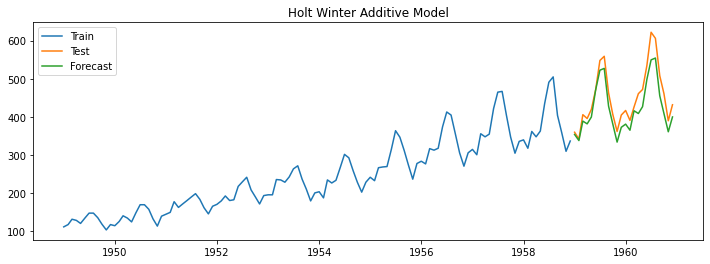

In [8]:
plt.figure(figsize=(12,4))

plt.plot(train.Passengers, label='Train')
plt.plot(test.Passengers, label='Test')
plt.plot(y_hat_hwa.forecast_hwa, label='Forecast')

plt.legend()
plt.title('Holt Winter Additive Model')

plt.show()

In [9]:
# error
error = y_hat_hwa.iloc[:, 0] - y_hat_hwa.iloc[:, 1]

rmse = np.sqrt((np.sum(error**2))/len(error))
mape = (np.sum(abs(error) / y_hat_hwa.iloc[:,0])) * 100 / len(error)

print(f"RMSE: {rmse}, MAPE:{mape}")

RMSE: 35.09529669456147, MAPE:6.525967215192234
